https://www.kaggle.com/code/medharounzamouri/movies-eda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/imdb_top_1000.csv')

In [3]:
pd.options.mode.chained_assignment = None


In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000"


Observation: We notice that there are two columns that will not help us too much on an exploratory data analysis which are 'Poster_Link' and 'Overview'
so we can drop those 2 columns

In [5]:
df = df.drop(columns=['Poster_Link', 'Overview'])

In [6]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000"


In [7]:
df.shape

(1000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


Observation: Looking at the .info() it seems reasonable except for the type of the column 'Gross' which have to be an integer value since it's in Dollars so let's convert it


In [9]:
df1= df.dropna(subset=['Gross'])

In [10]:
df1.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000"


In [11]:
df1['Gross'] = df1['Gross'].str.replace(',','').astype(float)

In [12]:
df1['Gross']

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
990       696690.0
991      1378435.0
992    141843612.0
994     13780024.0
997     30500000.0
Name: Gross, Length: 831, dtype: float64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        831 non-null    object 
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Meta_score     750 non-null    float64
 7   Director       831 non-null    object 
 8   Star1          831 non-null    object 
 9   Star2          831 non-null    object 
 10  Star3          831 non-null    object 
 11  Star4          831 non-null    object 
 12  No_of_Votes    831 non-null    int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 97.4+ KB


Now we have a reasonable data types describing our dataset and we get rid of some NaN values as well .

Do successful movies (artistically) make money ?
To answer this we will make another tiny dataframe including just two factors : meta score and gross

In [20]:
new_df1 = pd.DataFrame().assign(MetaScore=df1['Meta_score'], Gross = df1['Gross'])

In [21]:
new_df1.head()

,MetaScore,Gross
0,80.0,28341469.0
1,100.0,134966411.0
2,84.0,534858444.0
3,90.0,57300000.0
4,96.0,4360000.0


In [22]:
new_df1.isnull().sum()

MetaScore    81
Gross         0
dtype: int64

In [23]:
new_df1 = new_df1.dropna()

In [24]:
new_df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 997
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MetaScore  750 non-null    float64
 1   Gross      750 non-null    float64
dtypes: float64(2)
memory usage: 17.6 KB


In [25]:
new_df1.describe()

,MetaScore,Gross
count,750.000000,7.500000e+02
mean,77.460000,7.495207e+07
std,12.493967,1.133280e+08
min,28.000000,1.305000e+03
25%,70.000000,5.014812e+06
50%,78.000000,3.190000e+07
75%,86.000000,9.809157e+07
max,100.000000,9.366622e+08


We will define a commercially successful movie if its gross is >= the mean gross and                                                                        
we define an artistically successful movie if its metascore is >= the mean metascore


In [26]:
new_df1

,MetaScore,Gross
0,80.0,28341469.0
1,100.0,134966411.0
2,84.0,534858444.0
3,90.0,57300000.0
4,96.0,4360000.0
...,...,...
990,77.0,696690.0
991,50.0,1378435.0
992,65.0,141843612.0
994,96.0,13780024.0


In [27]:
succ_art = new_df1[new_df1['MetaScore']>=77]


In [28]:
succ_art

,MetaScore,Gross
0,80.0,28341469.0
1,100.0,134966411.0
2,84.0,534858444.0
3,90.0,57300000.0
4,96.0,4360000.0
...,...,...
988,90.0,132088635.0
989,87.0,959000.0
990,77.0,696690.0
994,96.0,13780024.0


In [30]:
succ_art['just'] = succ_art['Gross']>=7.5e+07

In [32]:
succ_art

,MetaScore,Gross,just
0,80.0,28341469.0,False
1,100.0,134966411.0,True
2,84.0,534858444.0,True
3,90.0,57300000.0,False
4,96.0,4360000.0,False
...,...,...,...
988,90.0,132088635.0,True
989,87.0,959000.0,False
990,77.0,696690.0,False
994,96.0,13780024.0,False


Text(0.5, 0.98, 'Count Of Successful movies in both Metascore and Gross')

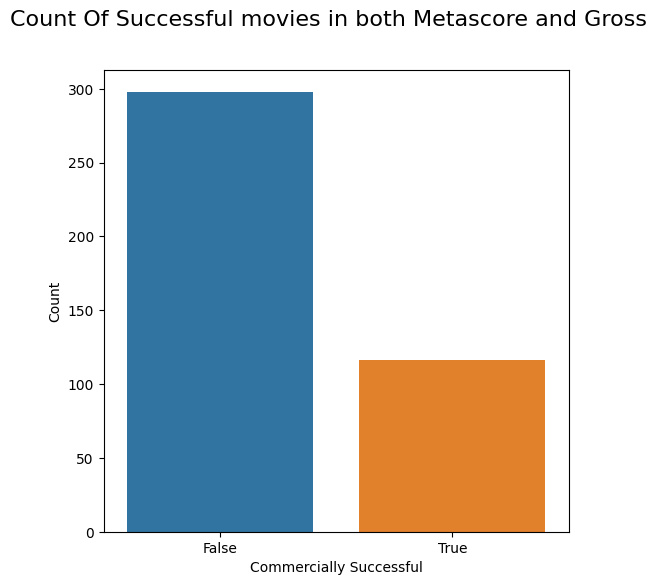

In [33]:
plotting_dataframe = succ_art['just'].value_counts().to_frame(name='count')
plotting_dataframe = plotting_dataframe.reset_index()
plotting_dataframe.rename(columns={'index':'Commercially Successful','count':'Count'}, inplace=True)

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=plotting_dataframe, x='Commercially Successful', y='Count')
fig.suptitle('Count Of Successful movies in both Metascore and Gross', fontsize=16)


Thus, we conclude that this world is unjust


In [34]:
df1

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0


After we looked again at the dataset we will question the correlation between Metascore and IMDb rating on artistically successful movies


In [36]:
corr_df1 = df1[['IMDB_Rating', "Meta_score"]]
corr_df1.dropna(inplace=True)
print(corr_df1.info())
corr_df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 997
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  750 non-null    float64
 1   Meta_score   750 non-null    float64
dtypes: float64(2)
memory usage: 17.6 KB
None


,IMDB_Rating,Meta_score
0,9.3,80.0
1,9.2,100.0
2,9.0,84.0
3,9.0,90.0
4,9.0,96.0
...,...,...
990,7.6,77.0
991,7.6,50.0
992,7.6,65.0
994,7.6,96.0


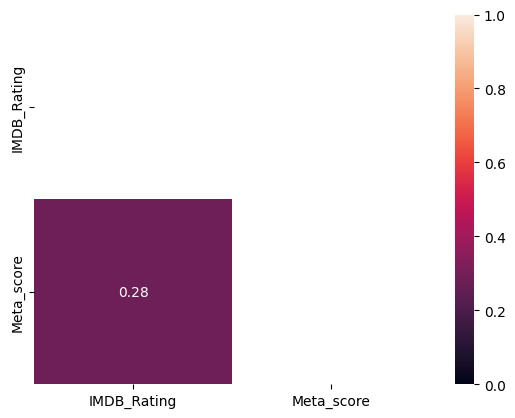

In [38]:
import numpy as np

mask = np.triu(corr_df1.corr())

ax = sns.heatmap(corr_df1.corr(), mask=mask, annot=True, vmin=0, vmax=1)


We got a correlation of 0.28 which is absolutely not a strong correlation                                                                    so we conclude that proffessional reviewers don't see always eye to eye with the audience.


In [39]:
# Now we want to predict hwo many movies will be successful for the next 10 years¶

tmp = df1.dropna(subset=['Released_Year','Meta_score'])
tmp = tmp[tmp['Meta_score'] >= 77]
tmp = tmp[['Released_Year']]
tmp = tmp.value_counts().to_frame(name='Count').reset_index().sort_values(by=['Released_Year']).drop(86)

tmp


,Released_Year,Count
69,1925,1
79,1927,1
72,1930,1
73,1931,1
74,1933,1
...,...,...
5,2015,12
3,2016,13
4,2017,12
24,2018,6


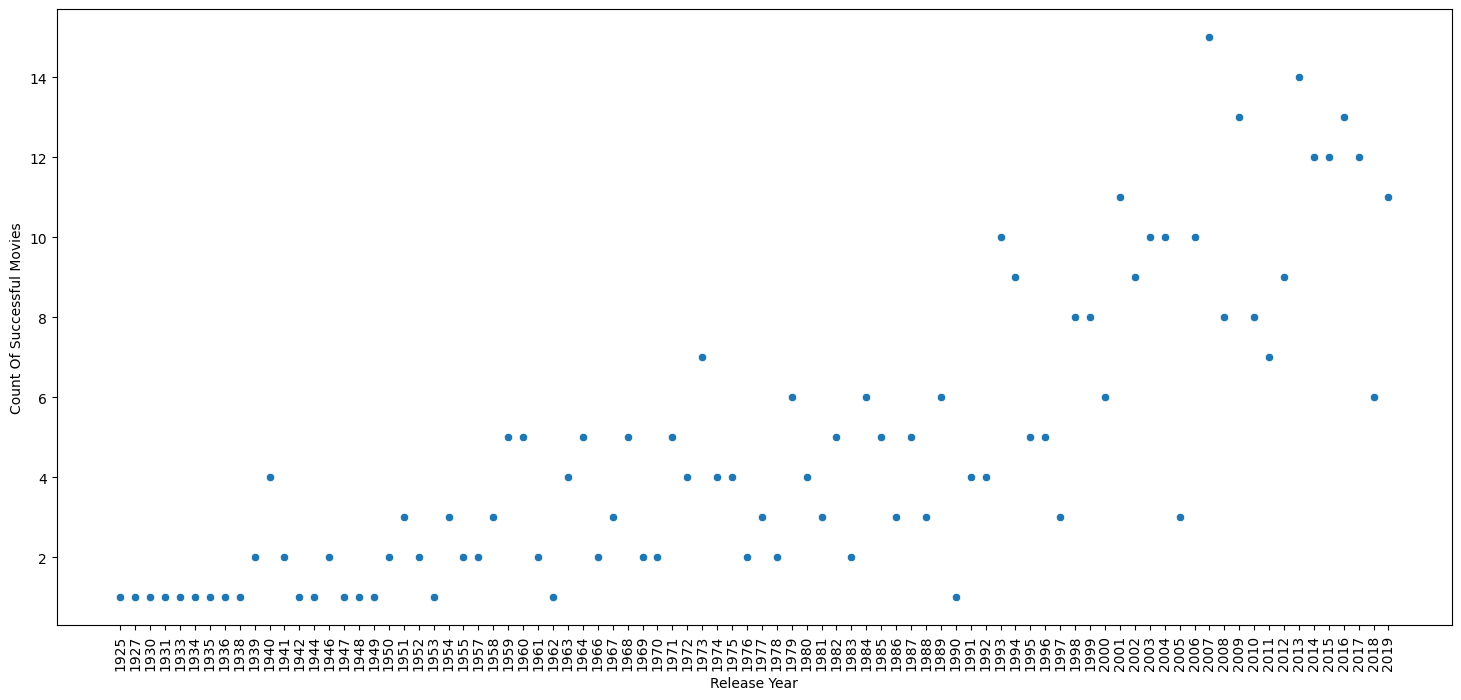

In [40]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.scatterplot(data=tmp, x='Released_Year', y='Count')
ax.set_xlabel('Release Year')
ax.set_ylabel('Count Of Successful Movies')
ax.tick_params(axis='x', rotation=90)

We notice that the first 9 years have an equal count of 1 so we will get rid of the first 8 and keep the last to make our prediction more accurate


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 71 to 7
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Released_Year  78 non-null     int64
 1   Count          78 non-null     int64
dtypes: int64(2)
memory usage: 1.8 KB
None


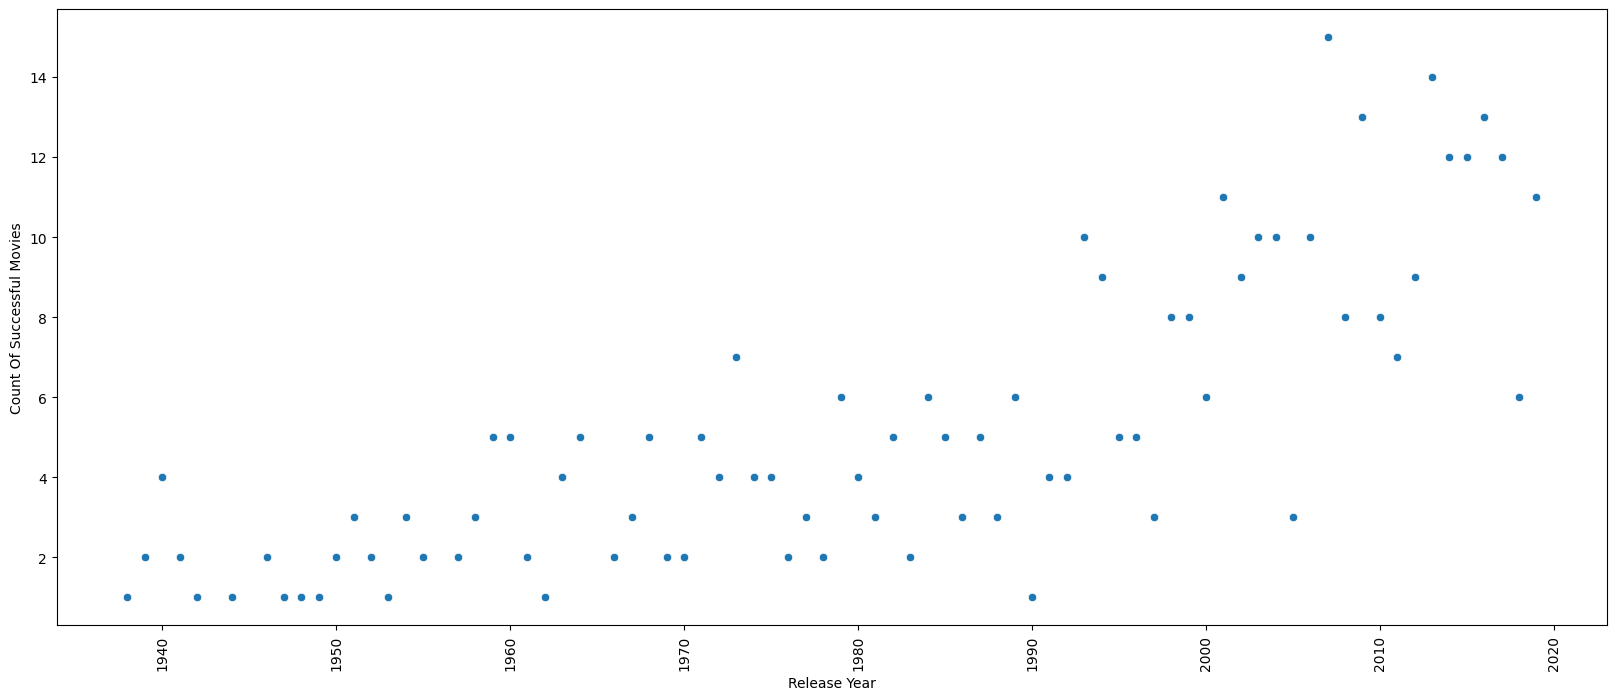

In [41]:
tmp['Released_Year'] = tmp['Released_Year'].astype(int)
tmp = tmp[tmp['Released_Year'] >= 1938]
print(tmp.info())

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.scatterplot(data=tmp, x='Released_Year', y='Count')
ax.set_xlabel('Release Year')
ax.set_ylabel('Count Of Successful Movies')
ax.tick_params(axis='x', rotation=90)

Now we are ready to go and visualize the prediction line through 2029


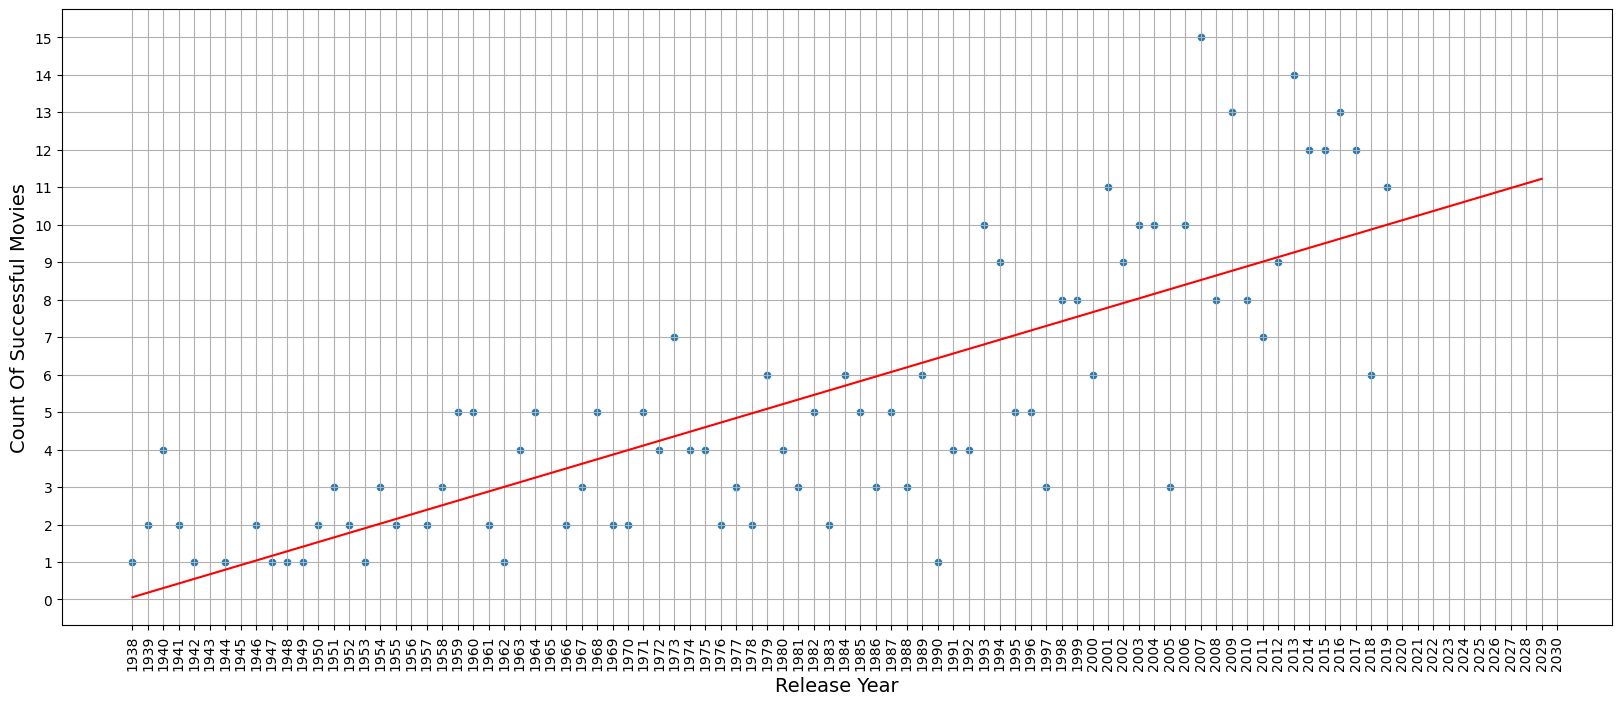

In [42]:
from scipy.stats import linregress

linear_regression = linregress(tmp['Released_Year'], tmp['Count'])

first_year = tmp['Released_Year'].min()
last_year = 2029

years = [year for year in range(first_year,last_year + 1)]
counts = [y * linear_regression.slope + linear_regression.intercept for y in range(first_year,last_year + 1)]
ax.plot(years, counts, 'r')
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
ax.set_xticks([year for year in range(first_year,2031)])
ax.set_yticks([n for n in range(0,16)])
ax.grid()

fig